In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.mlab as mlab
import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Normal, a Poisson, a Binomial, a Chi-Squared distribution, and Exponential distribution
## the distributions is Normal
mymean = 100

md ={}
allmeans = []

In [3]:
md['normal'] = {}

size = []
for i in range(100):
    np.random.seed(i+1)
    size.append(int(np.random.rand()*1990 + 11))  # size>10 & size < 2000

for s in size:
    np.random.seed(s+1)
    md['normal'][s] = np.random.randn(s) + mymean

md['normal']['mean'] = {}

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


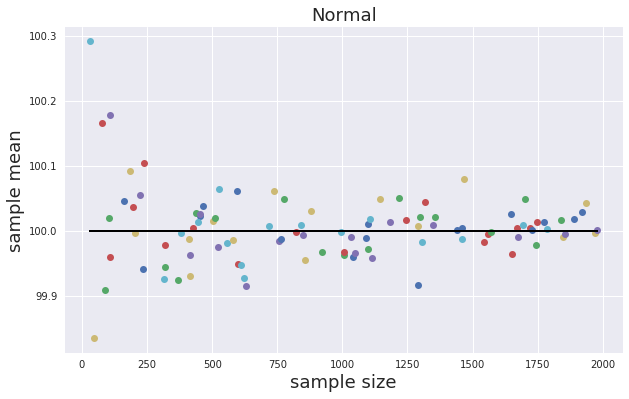

In [4]:
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for n in md['normal']:
    if not type(n) == str:
        allmeans.append(md['normal'][n].mean())
        md['normal']['mean'][n] = md['normal'][n].mean()
        axnormal_mu_n.plot(n, md['normal']['mean'][n], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([min(size), max(size)], [mymean, mymean], 'k')

# Figure 1
Here is the figure about the sample size against the sample mean of Normal distribution. From the the figure, we can see that most samples mean are around 100. And as the sample size become larger and larger,  the sample mean are closer to 100. This is the law of large numbers.

In [5]:
md['poisson'] = {}

size = []
for i in range(100):
    np.random.seed(i+2)
    size.append(int(np.random.rand()*1990 + 11))  # size>10 & size < 2000

for s in size:
    np.random.seed(s+2)
    md['poisson'][s] = np.random.poisson(mymean, s)
    
md['poisson']['mean'] = {}

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


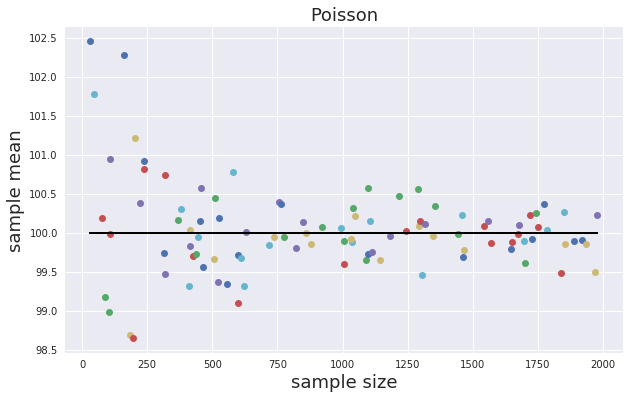

In [6]:
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for n in md['poisson']:
    if not type(n) == str:
        allmeans.append(md['poisson'][n].mean())
        md['poisson']['mean'][n] = md['poisson'][n].mean()
        axpoisson_mu_n.plot(n, md['poisson']['mean'][n], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson', fontsize=18)
        axpoisson_mu_n.plot([min(size), max(size)], [mymean, mymean], 'k')

# Figure 2
Here is the figure about the sample size against the sample mean of Poisson distribution. From the the figure, we can see that most samples mean are around 100. And as the sample size become larger and larger,  the sample mean are closer to 100. This is the law of large numbers.

In [7]:
md['binomial'] = {}

size = []
for i in range(100):
    np.random.seed(i+3)
    size.append(int(np.random.rand()*1990 + 11))  # size>10 & size < 2000

for s in size:
    np.random.seed(s+3)
    md['binomial'][s] = np.random.binomial(200, 0.5, s)
    
md['binomial']['mean'] = {}

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


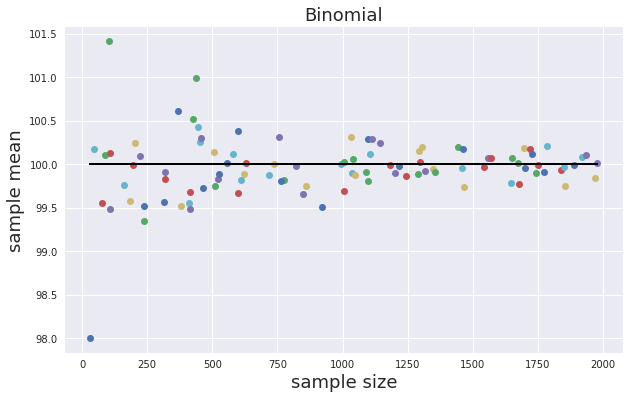

In [8]:
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for n in md['binomial']:
    if not type(n) == str:
        allmeans.append(md['binomial'][n].mean())
        md['binomial']['mean'][n] = md['binomial'][n].mean()
        axbinomial_mu_n.plot(n, md['binomial']['mean'][n], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(size), max(size)], [mymean, mymean], 'k')

# Figure 3
Here is the figure about the sample size against the sample mean of Binomial distribution. From the the figure, we can see that most samples mean are around 100. And as the sample size become larger and larger,  the sample mean are closer to 100. This is the law of large numbers 

In [9]:
md['chisquare'] = {}

size = []
for i in range(100):
    np.random.seed(i+4)
    size.append(int(np.random.rand()*1990 + 11))  # size>10 & size < 2000

for s in size:
    np.random.seed(s+4)
    md['chisquare'][s] = np.random.chisquare(mymean, s)
    
md['chisquare']['mean'] = {}

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


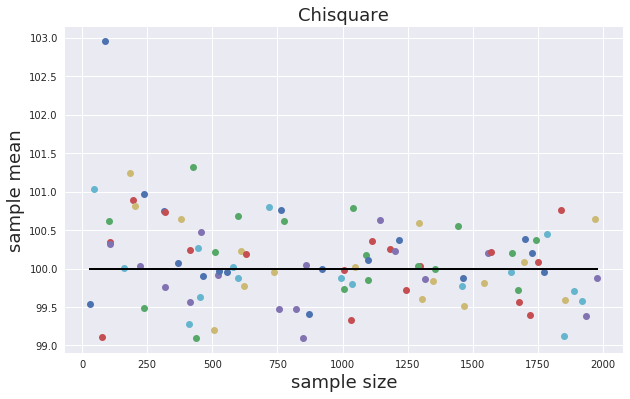

In [10]:
axchisquare_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for n in md['chisquare']:
    if not type(n) == str:
        allmeans.append(md['chisquare'][n].mean())
        md['chisquare']['mean'][n] = md['chisquare'][n].mean()
        axchisquare_mu_n.plot(n, md['chisquare']['mean'][n], 'o')
        axchisquare_mu_n.set_xlabel('sample size', fontsize=18)
        axchisquare_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisquare_mu_n.set_title('Chisquare', fontsize=18)
        axchisquare_mu_n.plot([min(size), max(size)], [mymean, mymean], 'k')

# Figure 4
Here is the figure about the sample size against the sample mean of Chisquare distribution. From the the figure, we can see that most samples mean are around 100. And as the sample size become larger and larger,  the sample mean are closer to 100. This is the law of large numbers 

In [11]:
md['exponential'] = {}

size = []
for i in range(100):
    np.random.seed(i+5)
    size.append(int(np.random.rand()*1990 + 11))  # size>10 & size < 2000

for s in size:
    np.random.seed(s+5)
    md['exponential'][s] = np.random.exponential(mymean, s)
    
md['exponential']['mean'] = {}

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


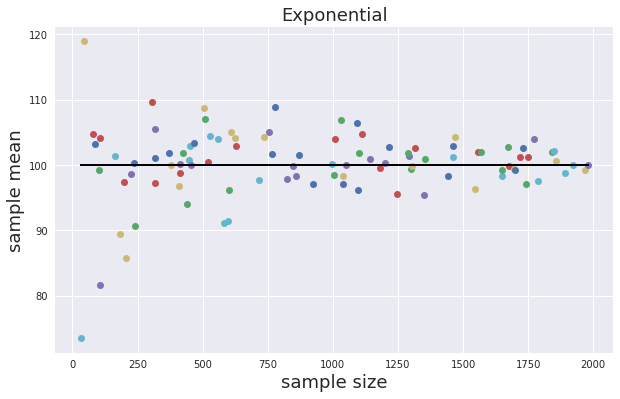

In [12]:
axexponential_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for n in md['exponential']:
    if not type(n) == str:
        allmeans.append(md['exponential'][n].mean())
        md['exponential']['mean'][n] = md['exponential'][n].mean()
        axexponential_mu_n.plot(n, md['exponential']['mean'][n], 'o')
        axexponential_mu_n.set_xlabel('sample size', fontsize=18)
        axexponential_mu_n.set_ylabel('sample mean', fontsize=18)
        axexponential_mu_n.set_title('Exponential', fontsize=18)
        axexponential_mu_n.plot([min(size), max(size)], [mymean, mymean], 'k')

# Figure 5
Here is the figure about the sample size against the sample mean of Exponential distribution. From the the figure, we can see that most samples mean are around 100. And as the sample size become larger and larger,  the sample mean are closer to 100. This is the law of large numbers 

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


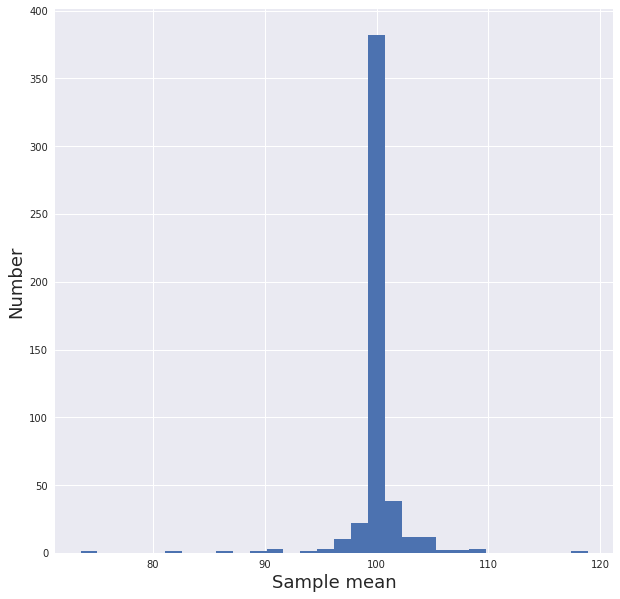

In [13]:
pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins=30)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('Number', fontsize = 18)
pl.show()

# Figure 6
Here is the histogram about the all the sample mean and its number. From the figure we can see that most sampel means are around 100. Those number seems follow the normal distribution, which is the Central Limit Theorem.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


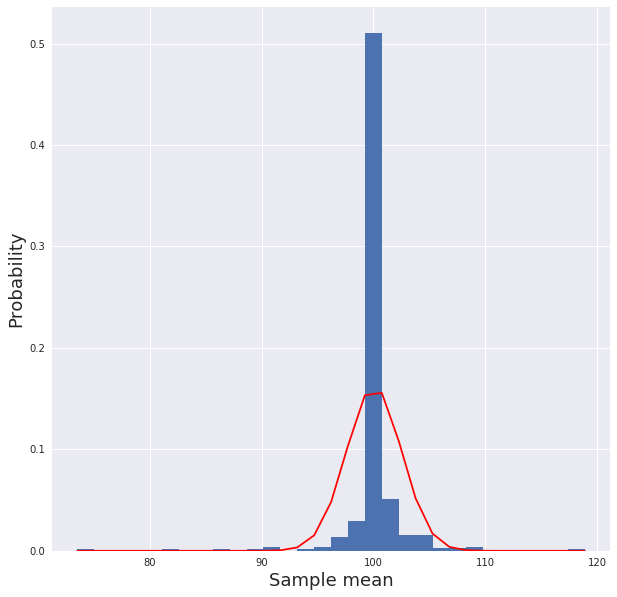

In [14]:
pl.figure(figsize=(10, 10))
n, bins, patches = pl.hist(allmeans, bins=30, normed=1)

mu = np.mean(allmeans)
sigma = np.std(allmeans)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r-') 

pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('Probability', fontsize = 18)
pl.show()

# Figure 7
Here is the histogram and its normal fitted curve about the all the sample mean and its probability. From the figure we can see that most sampel means are around 100 and its tendency is following the fitted curve. So from this figure, we can see what is the Central Limit Theorem looks like.